1) The provided data (link above) contains various details and attributes associated with used cars. The
target variable, which is the central focus of analysis, is the price of the used cars, and it is measured in
lakhs. The data in this dataset is tabular, with rows and columns, where each row represents a specific
used car listing, and each column represents a particular attribute or feature of these cars. Features are
Make and model of the car, Location or city of sale, Year of manufacture, Mileage, Odometer
(kilometers driven), Fuel type (petrol or diesel), Transmission type (manual or automatic), Number of
owners, Engine displacement, Engine horsepower, Number of seats, and Price when the car was new.

a) Look for the missing values in all the columns and either impute them (replace with mean,
median, or mode) or drop them. Justify your action for this task. (4 points)

In [124]:
import pandas as pd

# Get File
df = pd.read_csv('/content/drive/MyDrive/train.csv')
print(df.shape)

# From what I understand about the dataset, New Price is just how expensive the car was when it was new and I cannot see a way to compute that for each individual car, so I dropped all datasets with null values since they were incomplete
df_na_dropped = df.dropna(subset=['New_Price'])

# There is 1 NaN value in mileage, and since I cannot confidently assume what the mileage would be for this car I will be dropping it as well
df_na_dropped = df_na_dropped.dropna(subset=['Mileage'])
print(df_na_dropped.shape)

# Though this drastically reduces our dataset, it gives us accurate information for every item in the dataset which will give us the most accurate information


(5847, 14)
(814, 14)


b) Remove the units from some of the attributes and only keep the numerical values (for
example remove kmpl from “Mileage”, CC from “Engine”, bhp from “Power”, and lakh from
“New_price”). (4 points)

In [125]:
df_na_dropped['Mileage'] = df_na_dropped['Mileage'].astype(str)
df_na_dropped['Mileage'] = df_na_dropped['Mileage'].str.extract('(\\d+\\.?\\d*)')
df_na_dropped['Mileage'] = pd.to_numeric(df_na_dropped['Mileage'])

df_na_dropped['Engine'] = df_na_dropped['Engine'].astype(str)
df_na_dropped['Engine'] = df_na_dropped['Engine'].str.extract('(\\d+\\.?\\d*)')
df_na_dropped['Engine'] = pd.to_numeric(df_na_dropped['Engine'])

df_na_dropped['Power'] = df_na_dropped['Power'].astype(str)
df_na_dropped['Power'] = df_na_dropped['Power'].str.extract('(\\d+\\.?\\d*)')
df_na_dropped['Power'] = pd.to_numeric(df_na_dropped['Power'])

df_na_dropped['New_Price'] = df_na_dropped['New_Price'].astype(str)
df_na_dropped['New_Price'] = df_na_dropped['New_Price'].str.extract('(\\d+\\.?\\d*)')
df_na_dropped['New_Price'] = pd.to_numeric(df_na_dropped['New_Price'])

print(df_na_dropped.head(10))

    Unnamed: 0                               Name    Location  Year  \
1            2                       Honda Jazz V     Chennai  2011   
5            7  Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
8           10                   Maruti Ciaz Zeta       Kochi  2018   
13          15        Mitsubishi Pajero Sport 4X4       Delhi  2014   
18          20                  BMW 3 Series 320d       Kochi  2014   
26          28                Honda WRV i-VTEC VX       Kochi  2018   
32          34      Volkswagen Vento 1.6 Highline  Coimbatore  2014   
34          36      Maruti Vitara Brezza ZDi Plus       Kochi  2018   
42          44   Hyundai Elantra 2.0 SX Option AT   Bangalore  2014   
45          47     Toyota Innova Crysta 2.7 GX MT   Bangalore  2012   

    Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
1               46000    Petrol       Manual      First    13.00    1199   
5               36000    Diesel    Automatic      First    11.36  

Change the categorical variables (“Fuel_Type” and “Transmission”) into numerical one hot
encoded value. (4 points).

In [126]:
df_na_dropped = pd.get_dummies(df_na_dropped, columns=['Fuel_Type'], dtype='int')
df_na_dropped = pd.get_dummies(df_na_dropped, columns=['Transmission'], dtype='int')
print(df_na_dropped.head())


    Unnamed: 0                               Name Location  Year  \
1            2                       Honda Jazz V  Chennai  2011   
5            7  Toyota Innova Crysta 2.8 GX AT 8S   Mumbai  2016   
8           10                   Maruti Ciaz Zeta    Kochi  2018   
13          15        Mitsubishi Pajero Sport 4X4    Delhi  2014   
18          20                  BMW 3 Series 320d    Kochi  2014   

    Kilometers_Driven Owner_Type  Mileage  Engine   Power  Seats  New_Price  \
1               46000      First    13.00    1199   88.70    5.0       8.61   
5               36000      First    11.36    2755  171.50    8.0      21.00   
8               25692      First    21.56    1462  103.25    5.0      10.65   
13             110000      First    13.50    2477  175.56    7.0      32.01   
18              32982      First    22.69    1995  190.00    5.0      47.87   

    Price  Fuel_Type_Diesel  Fuel_Type_Petrol  Transmission_Automatic  \
1    4.50                 0                

d) Create one more feature and add this column to the dataset (you can use mutate function in
R for this). For example, you can calculate the current age of the car by subtracting “Year” value
from the current year. (4 points)

In [127]:
df_na_dropped['Age'] = 2025 - df_na_dropped['Year']
print(df_na_dropped.head(10))

    Unnamed: 0                               Name    Location  Year  \
1            2                       Honda Jazz V     Chennai  2011   
5            7  Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
8           10                   Maruti Ciaz Zeta       Kochi  2018   
13          15        Mitsubishi Pajero Sport 4X4       Delhi  2014   
18          20                  BMW 3 Series 320d       Kochi  2014   
26          28                Honda WRV i-VTEC VX       Kochi  2018   
32          34      Volkswagen Vento 1.6 Highline  Coimbatore  2014   
34          36      Maruti Vitara Brezza ZDi Plus       Kochi  2018   
42          44   Hyundai Elantra 2.0 SX Option AT   Bangalore  2014   
45          47     Toyota Innova Crysta 2.7 GX MT   Bangalore  2012   

    Kilometers_Driven Owner_Type  Mileage  Engine   Power  Seats  New_Price  \
1               46000      First    13.00    1199   88.70    5.0       8.61   
5               36000      First    11.36    2755  171.50   

e) Perform select, filter, rename, mutate, arrange and summarize with group by operations (or
their equivalent operations in python) on this dataset. (4 points)


In [128]:
# Select
print("Select Operation")
df_selected = df_na_dropped[['Name', 'Location', 'Year', 'Price']]
print(df_selected.head(5))

# Filter
print("\n\n\nFilter Operation")
df_filtered = df_na_dropped[df_na_dropped['Price'] > 10]
print(df_filtered.head(5))

# Mutate
print("\n\n\nMutate Operation")
df_na_dropped['Price_Change'] = df_na_dropped['New_Price'] - df_na_dropped['Price']
print(df_na_dropped.head(5))

# Arrange
print("\n\n\nArrage Operation")
df_sorted = df_na_dropped.sort_values(by='Price')
print(df_sorted.head(5))

# Summarize
print("\n\n\nSummarize Operation")
summary_df = pd.DataFrame({
    'N': [len(df_na_dropped)],
    'in_Chennai': [(df_na_dropped['Location'] == 'Chennai').sum()]
})
print(summary_df)


Select Operation
                                 Name Location  Year  Price
1                        Honda Jazz V  Chennai  2011   4.50
5   Toyota Innova Crysta 2.8 GX AT 8S   Mumbai  2016  17.50
8                    Maruti Ciaz Zeta    Kochi  2018   9.95
13        Mitsubishi Pajero Sport 4X4    Delhi  2014  15.00
18                  BMW 3 Series 320d    Kochi  2014  18.55



Filter Operation
    Unnamed: 0                               Name   Location  Year  \
5            7  Toyota Innova Crysta 2.8 GX AT 8S     Mumbai  2016   
13          15        Mitsubishi Pajero Sport 4X4      Delhi  2014   
18          20                  BMW 3 Series 320d      Kochi  2014   
45          47     Toyota Innova Crysta 2.7 GX MT  Bangalore  2012   
58          60  Toyota Innova Crysta 2.4 GX MT 8S     Mumbai  2017   

    Kilometers_Driven Owner_Type  Mileage  Engine   Power  Seats  New_Price  \
5               36000      First    11.36    2755  171.50    8.0      21.00   
13             110000   

2) The data file diabetes.csv contains data of 768 patients. In this data there are 8 attributes
(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction,
and Age) and 1 response variable (Outcome). The response variable, Outcome, has binary value
(1 indicating the outcome is diabetes and 0 means no diabetes). For this assignment purposes
we will consider this data as a population. Use this data to perform the following:

In [129]:
# Get the file
df2 = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
print(df2.shape)

(768, 9)


a) Set a seed (to ensure work reproducibility) and take a random sample of 25 observations
and find the mean Glucose and highest Glucose values of this sample and compare these
statistics with the population statistics of the same variable. You should use charts for this
comparison. (5 points)

Sample Mean: 113.92
Sample Max: 196
Population Mean: 120.89453125
Population Max: 199


/tmp/ipython-input-3431353608.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sample_df2['Glucose'], df2['Glucose']], labels=['Sample', 'Population'])


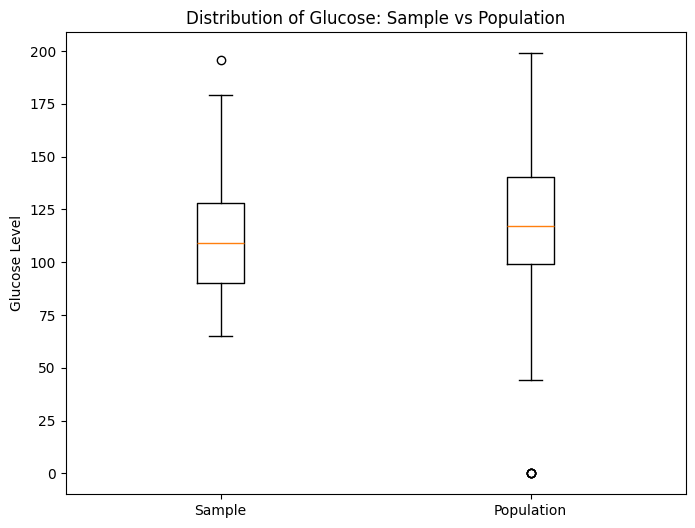

In [130]:
import matplotlib.pyplot as plt

seed = 50
sample_df2 = df2.sample(n=25, random_state=seed)

# Sample Data
sample_mean = sample_df2['Glucose'].mean()
sample_max  = sample_df2['Glucose'].max()

# DF Data
pop_mean = df2['Glucose'].mean()
pop_max  = df2['Glucose'].max()

print("Sample Mean:", sample_mean)
print("Sample Max:", sample_max)
print("Population Mean:", pop_mean)
print("Population Max:", pop_max)

plt.figure(figsize=(8,6))
plt.boxplot([sample_df2['Glucose'], df2['Glucose']], labels=['Sample', 'Population'])
plt.ylabel("Glucose Level")
plt.title("Distribution of Glucose: Sample vs Population")
plt.show()

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts. (5 points)

Sample 98th Percentile:  44.676
Population 98th Percentile:  47.52599999999996


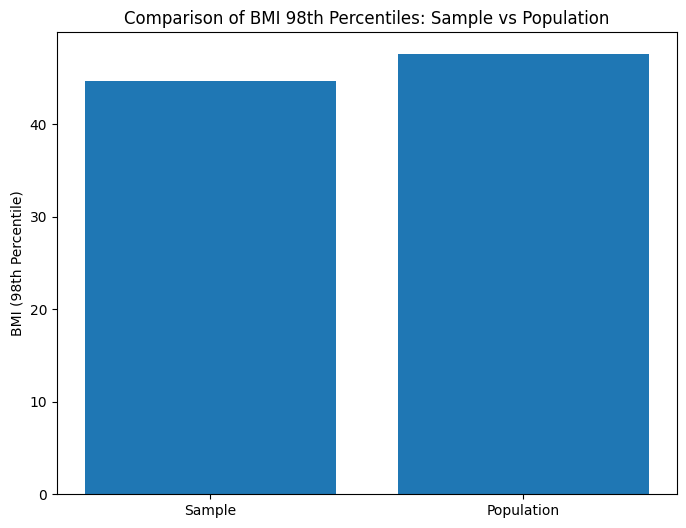

In [131]:
sample_p98 = sample_df2['BMI'].quantile(0.98)
population_p98 = df2['BMI'].quantile(0.98)

# Bar Chart
print("Sample 98th Percentile: ", sample_p98)
print("Population 98th Percentile: ", population_p98)
labels = ['Sample', 'Population']
values = [sample_p98, population_p98]

plt.figure(figsize=(8,6))
plt.bar(labels, values)
plt.ylabel("BMI (98th Percentile)")
plt.title("Comparison of BMI 98th Percentiles: Sample vs Population")
plt.show()

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure
and compare this with these statistics from the population for the same variable. Again, you
should create charts for this comparison. Report on your findings. (10 points)

Bootstrap Avg Mean: 68.96921333333333
Population Mean: 69.10546875
Bootstrap Avg Std: 19.254148739959987
Population Std: 19.355807170644777
Bootstrap Avg 98th Percentile: 97.74276
Population 98th Percentile: 99.31999999999994


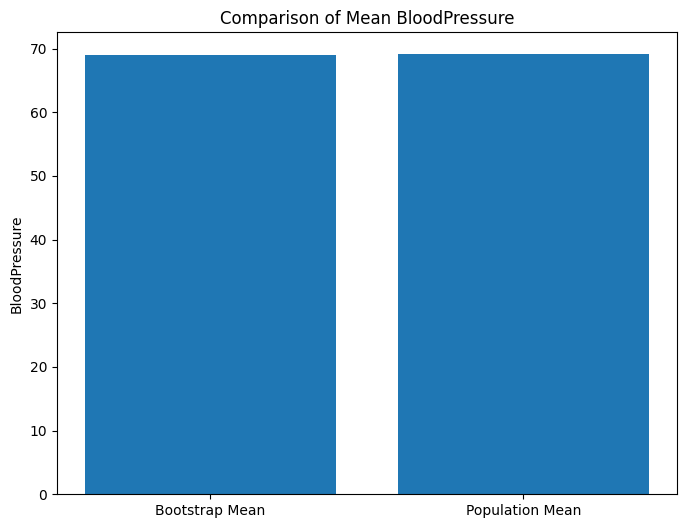

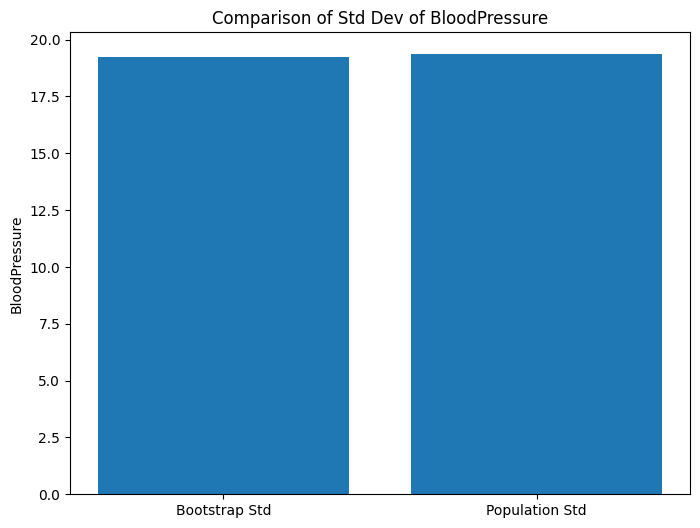

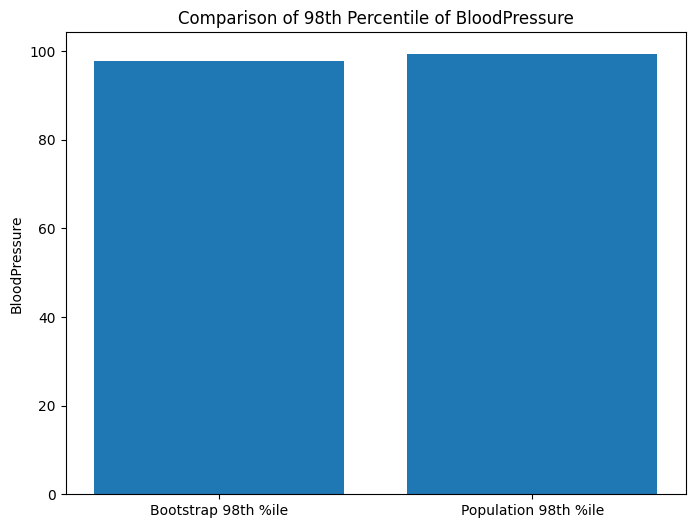

Percent Difference (Bootstrap Mean vs Population Mean): 0.1972%
Percent Difference (Bootstrap SD vs Population SD): 0.5252%
Percent Difference (Bootstrap 98th vs Population 98th): 1.5880%


In [132]:
import numpy as np
import random

np.random.seed(50)
random.seed(50)

sample_runs = 500
sample_size = 150

bootstrap_means = []
bootstrap_stds = []
bootstrap_p98 = []

for i in range(sample_runs):
  sample = df2['BloodPressure'].sample(n=sample_size, replace=True)
  bootstrap_means.append(sample.mean())
  bootstrap_stds.append(sample.std())
  bootstrap_p98.append(sample.quantile(0.98))

bootstrap_means = np.array(bootstrap_means)
bootstrap_stds = np.array(bootstrap_stds)
bootstrap_p98 = np.array(bootstrap_p98)

avg_boot_mean = bootstrap_means.mean()
avg_boot_std = bootstrap_stds.mean()
avg_boot_p98 = bootstrap_p98.mean()

pop_mean = df2['BloodPressure'].mean()
pop_std = df2['BloodPressure'].std()
pop_p98 = df2['BloodPressure'].quantile(0.98)

print("Bootstrap Avg Mean:", avg_boot_mean)
print("Population Mean:", pop_mean)
print("Bootstrap Avg Std:", avg_boot_std)
print("Population Std:", pop_std)
print("Bootstrap Avg 98th Percentile:", avg_boot_p98)
print("Population 98th Percentile:", pop_p98)

# Mean Comparison
plt.figure(figsize=(8,6))
plt.bar(['Bootstrap Mean', 'Population Mean'],
        [avg_boot_mean, pop_mean])
plt.ylabel("BloodPressure")
plt.title("Comparison of Mean BloodPressure")
plt.show()

# SD Comparison
plt.figure(figsize=(8,6))
plt.bar(['Bootstrap Std', 'Population Std'],
        [avg_boot_std, pop_std])
plt.ylabel("BloodPressure")
plt.title("Comparison of Std Dev of BloodPressure")
plt.show()

# 98th Comparison
plt.figure(figsize=(8,6))
plt.bar(['Bootstrap 98th %ile', 'Population 98th %ile'],
        [avg_boot_p98, pop_p98])
plt.ylabel("BloodPressure")
plt.title("Comparison of 98th Percentile of BloodPressure")
plt.show()

# Percent Difference
percent_diff_mean = abs(((avg_boot_mean - pop_mean) / pop_mean) * 100)
print(f"Percent Difference (Bootstrap Mean vs Population Mean): {percent_diff_mean:.4f}%")
percent_diff_sd = abs(((avg_boot_std - pop_std) / pop_std) * 100)
print(f"Percent Difference (Bootstrap SD vs Population SD): {percent_diff_sd:.4f}%")
percent_diff_98 = abs(((avg_boot_p98 - pop_p98) / pop_p98) * 100)
print(f"Percent Difference (Bootstrap 98th vs Population 98th): {percent_diff_98:.4f}%")

For the purpose of this experiment I used a random seed for reproducibility like earlier in the assignment, if you want to see the variability of it you can just delete the seed lines and run the code like normal. My findings concluded that when comparing Bootstrapping vs testing the whole population there was less than 2% margain of error. Though I feel like 500 samples is a bit overkill for a dataset of 768 tuples but I would be interested in finding how many tests we'd have to run before it started plateu-ing in effectiveness. For reference, I also ran this exact code with 250 samples and while SD difference increased slightly it was all still within the <2% margain of error